# Cryptocurrency Data Visualization and Bitcoin Price Prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

##Importing all the necessary libraries

In [1]:
import pandas as pd       #Data analysis and Manipulation
from fbprophet import Prophet # Bitcoin Price Prediction


In [2]:
import plotly.offline as py           # create table
import plotly.graph_objs as go        #create candlestick charts             # Importing Plotly
import plotly.express as px           #create Violin plots, pie charts, box plot, scatter plots,line graph, area graph

In [3]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly 

##Importing the dataset and analyzing it

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/BitCoin Data/top_coins.csv')

In [9]:
df.head()


Date     Open     High      Low    Close  Adj Close    Volume Currency
0  10/1/2015  236.004  238.445  235.616  237.549    237.549  20488800  Bitcoin
1  10/2/2015  237.264  238.541  236.603  237.293    237.293  19677900  Bitcoin
2  10/3/2015  237.202  239.315  236.944  238.730    238.730  16482700  Bitcoin
3  10/4/2015  238.531  238.968  237.940  238.259    238.259  12999000  Bitcoin
4  10/5/2015  238.147  240.383  237.035  240.383    240.383  23335900  Bitcoin

In [11]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Currency     0
dtype: int64

In [8]:
#groupby 

df.groupby(['Currency']).count()

Date  Open  High   Low  Close  Adj Close  Volume
Currency                                                      
Binance Coin  2326  2326  2326  2326   2326       2326    2326
Bitcoin       3652  3652  3652  3652   3652       3652    3652
Bitcoin Cash  2330  2330  2330  2330   2330       2330    2330
Cardano       1080  1080  1080  1080   1080       1080    1080
Chainlink     2212  2212  2212  2212   2212       2212    2212
Dash          3652  3652  3652  3652   3652       3652    3652
Ethereum      3652  3652  3652  3652   3652       3652    3652
Litecoin      3652  3652  3652  3652   3652       3652    3652
Ripple        3652  3652  3652  3652   3652       3652    3652
Stellar       3652  3652  3652  3652   3652       3652    3652
Tether        3652  3652  3652  3652   3652       3652    3652
Tron          2226  2226  2226  2226   2226       2226    2226

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35738 entries, 0 to 35737
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       35738 non-null  object 
 1   Open       35738 non-null  float64
 2   High       35738 non-null  float64
 3   Low        35738 non-null  float64
 4   Close      35738 non-null  float64
 5   Adj Close  35738 non-null  float64
 6   Volume     35738 non-null  int64  
 7   Currency   35738 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.2+ MB


In [13]:
df.describe()

Open          High  ...     Adj Close        Volume
count  35738.000000  35738.000000  ...  35738.000000  3.573800e+04
mean     620.119789    637.314368  ...    620.692862  2.862706e+09
std     2052.719483   2108.318553  ...   2054.123362  7.715742e+09
min        0.001000      0.002000  ...      0.001000  1.160000e+02
25%        0.260000      0.275000  ...      0.261000  2.608815e+07
50%        4.019000      4.119000  ...      4.025000  2.482212e+08
75%      162.596000    168.243000  ...    162.891000  1.595345e+09
max    19475.801000  20089.000000  ...  19497.400000  9.931533e+10

[8 rows x 6 columns]

##Data Visualization- All top Cryptocurrencies


### Table : Visualizing data 

In [18]:
from plotly.figure_factory import create_table
table = create_table(df.head(10), colorscale='viridis')
py.iplot(table)

###Box plot : Analyzing volume

In [19]:
px.box(df, x= "Currency" , y = "Volume")

Bitcoin and Tether are popular 


### Pie Chart : Analyzing volume

In [20]:
px.pie(df,values= "Volume" , names= "Currency")

###Violin Plot: Analyzing Price

In [22]:
px.violin(df,x ="Currency", y ="Close")

In [23]:
px.box(df,x ="Currency", y ="Close",log_y=True)

In [21]:
df.head()

Date     Open     High      Low    Close  Adj Close    Volume Currency
0  10/1/2015  236.004  238.445  235.616  237.549    237.549  20488800  Bitcoin
1  10/2/2015  237.264  238.541  236.603  237.293    237.293  19677900  Bitcoin
2  10/3/2015  237.202  239.315  236.944  238.730    238.730  16482700  Bitcoin
3  10/4/2015  238.531  238.968  237.940  238.259    238.259  12999000  Bitcoin
4  10/5/2015  238.147  240.383  237.035  240.383    240.383  23335900  Bitcoin

### Scatter Plots : Comparing between Currencies

In [26]:
px.scatter(df, x ="Close", y="Volume",hover_data=['High','Low','Date'],color='Currency', height=400)

In [28]:
#with log function (better visiblity of other currencies than bitcoin and tether)
px.scatter(df, x ="Close", y="Volume",hover_data=['High','Low','Date'],color='Currency', height=400, log_x=True ,log_y=True)

##Crypto Specific Financial Data Visualization- Bitcoin(2015 to 2020)( as it is most popular currency ) SOURCE = YAHOO FINANCE


In [31]:
bit = pd.read_csv('/content/drive/MyDrive/DataSets/BitCoin Data/BTC-INR.csv')

In [34]:
bit.head(1)

Date          Open  ...     Adj Close      Volume
0  2015-12-01  25100.144531  ...  24090.228516  4017532307

[1 rows x 7 columns]

In [36]:
# Bitcoin specific Area graph
px.area(bit,x="Date",y="Close")

In [37]:
px.line(bit, x= "Date", y= "Volume")

In [38]:
# Bitcoin specific Violin plot

px.violin(bit, y = "High")

In [39]:
# CandleStick Charts- Financial data visualization
fig = go.Figure(go.Candlestick(x=bit['Date'],
                               open= bit["Open"],
                               high= bit['High'],
                               low=bit["Low"],
                               close=bit['Close']
                               ))
fig.show()

# Bitcoin Prediction using Facebook Prophet

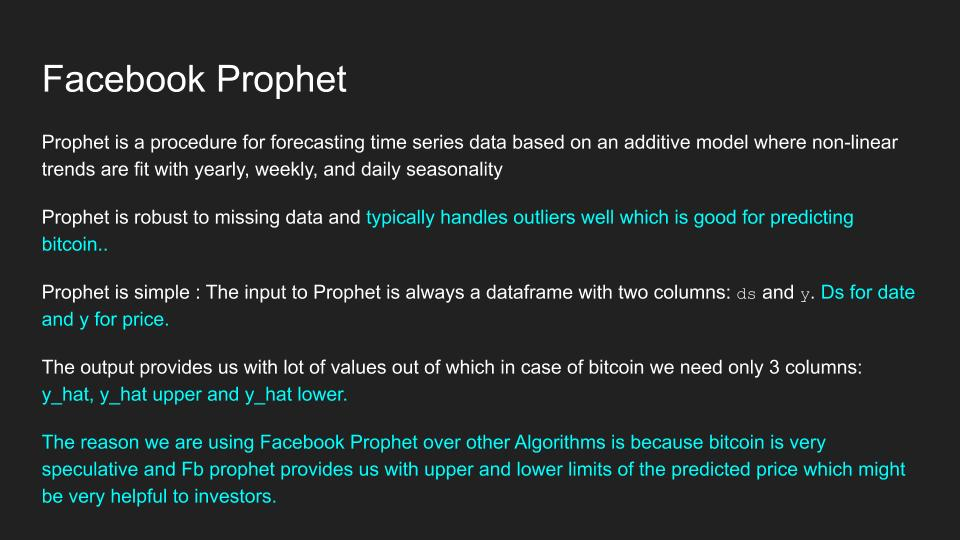

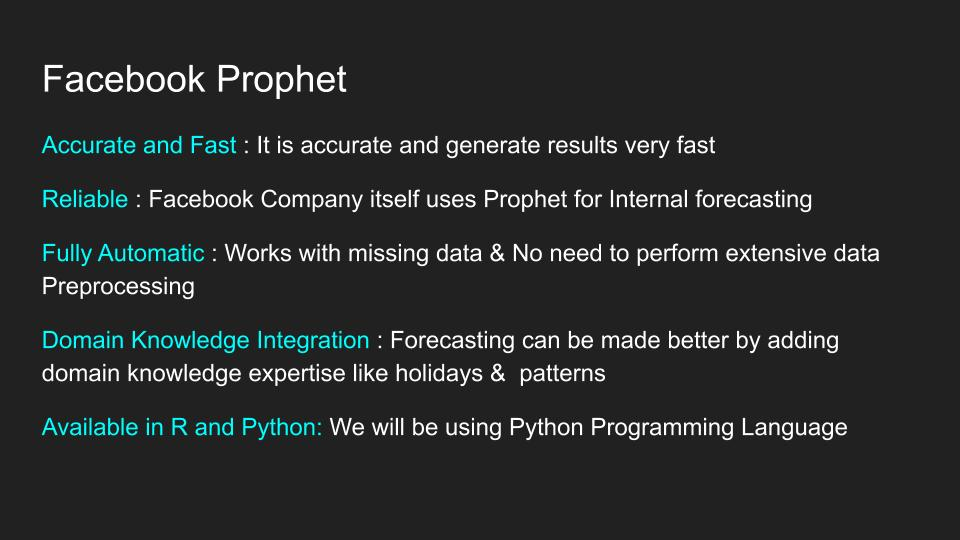

## Data Preparation

In [40]:
bit.head()

Date          Open  ...     Adj Close      Volume
0  2015-12-01  25100.144531  ...  24090.228516  4017532307
1  2015-12-02  24047.494141  ...  23905.332031  3604597917
2  2015-12-03  23914.914063  ...  24118.125000  3387790820
3  2015-12-04  24132.554688  ...  24199.974609  2384401935
4  2015-12-05  24235.822266  ...  25916.839844  4416581832

[5 rows x 7 columns]

In [41]:
Date_Close =['Date','Close']
df1 =pd.DataFrame(bit,columns= Date_Close)

In [42]:
prophet_df = df1.rename(columns={'Date':'ds','Close':'y'})

In [43]:
prophet_df.head(2)

ds             y
0  2015-12-01  24090.228516
1  2015-12-02  23905.332031

##Modelling

In [44]:
model = Prophet()

In [45]:
model.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [46]:
future = model.make_future_dataframe(periods=30)

In [47]:
future

ds
0    2015-12-01
1    2015-12-02
2    2015-12-03
3    2015-12-04
4    2015-12-05
...         ...
1853 2020-12-27
1854 2020-12-28
1855 2020-12-29
1856 2020-12-30
1857 2020-12-31

[1858 rows x 1 columns]

In [48]:
forecast = model.predict(future)

In [49]:
forecast

ds         trend  ...  multiplicative_terms_upper          yhat
0    2015-12-01 -1.491227e+04  ...                         0.0  6.022465e+04
1    2015-12-02 -1.426752e+04  ...                         0.0  5.998932e+04
2    2015-12-03 -1.362278e+04  ...                         0.0  5.984280e+04
3    2015-12-04 -1.297803e+04  ...                         0.0  6.173127e+04
4    2015-12-05 -1.233329e+04  ...                         0.0  6.346902e+04
...         ...           ...  ...                         ...           ...
1853 2020-12-27  1.015299e+06  ...                         0.0  1.069235e+06
1854 2020-12-28  1.016614e+06  ...                         0.0  1.071709e+06
1855 2020-12-29  1.017930e+06  ...                         0.0  1.071098e+06
1856 2020-12-30  1.019245e+06  ...                         0.0  1.069815e+06
1857 2020-12-31  1.020560e+06  ...                         0.0  1.068673e+06

[1858 rows x 19 columns]

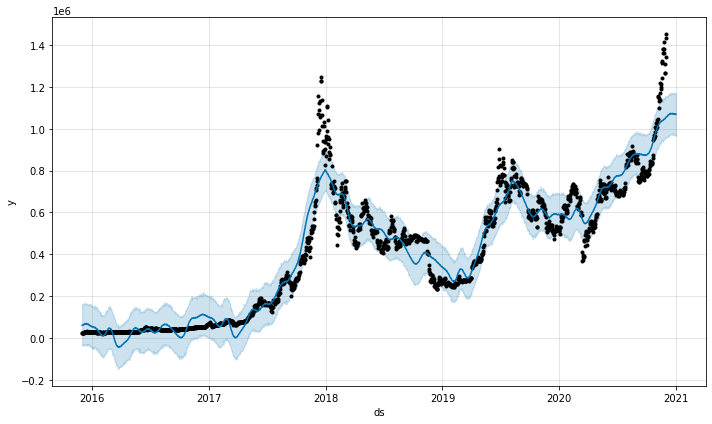

In [51]:
figure = model.plot(forecast, xlabel ='ds',ylabel='y')

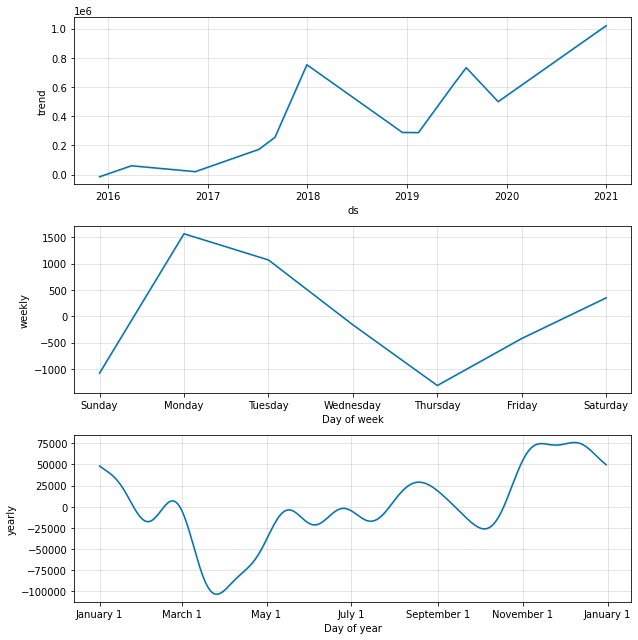

In [52]:
figure2 = model.plot_components(forecast)

## Downloading the Forecast data

In [54]:
forecast.to_csv('forecast.csv')

In [55]:
from google.colab import files
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>